## Метод скользящих режимов

Скользящие режимы управления предполагают наличие (осознанный выбор) некоторого многообразия в фазовом пространстве системы, движение по которому "навязывает" системе желаемые динамические свойства (система становится линейной или асимптотически стремится к нулю или удовлетворяет какому-то наперёд заданному условию). 

Метод скользящих режимов управления сводится к ответу на следующие вопросы:
1) Найдётся ли многообразие S, по которому система "скользит" в нужном направлении?  
2) Найдётся ли закон управления, приводящий систему на это многообразие за конечное время?  
3) Найдётся ли закон управления, поддерживающий систему на многообразии?  

### Пример.  Стабилизация верхнего положения маятника методом скользящих режимов
   
$$
m l^2 \ddot{\alpha} - m g l \sin{\alpha} = M_{\mathrm{упр}} \rightarrow
\left\{
    \begin{array}\\
       \dot{\alpha} = \omega, \\
       \dot{\omega} =  \frac{g}{l}\sin{\alpha} + u
    \end{array}   
\right.
$$

Обозначим $b = \frac{g}{l}$, отметим, что $b>0$ соответствует обращенному маятнику, $b=0$ -- двойному интегратору (точка на прямой под действием силы).
   
#### 1. Найдётся ли многообразие S, по которому система "скользит" в нужном направлении? 
Фазовое пространство системы двумерно и любая прямая вида 

\begin{equation} 
\omega + k \alpha= 0 \tag{1}
\end{equation}  

проходящая через начало координат фазовой плоскости $(\alpha, \omega)$, задает диференциальное уравнение:  

\begin{equation} 
\dot{{\alpha}} + k\alpha = 0, \tag{2}
\end{equation}
поскольку 
\begin{equation} 
\omega = \dot{\alpha} 
\end{equation}  

это эквивалентно экспоненциальному затуханию при некотором *с*, зависящем от начальных условий.  
\begin{equation} 
\alpha(t) = сe^{-kt}. \tag{3}\end{equation}
  
Таким образом, если привести систему на линейное одномерное многообразие  

\begin{equation} 
S: k\alpha + \omega = 0 \tag{4}
\end{equation} 

ей, тем самым, будут "навязаны" динамические свойства, определяющие сходимость траекторий системы к нулю (требуемому режиму).

Далее задача стабилизации нулевого равновесия сводится к двум этапам:

#### 2) обеспечение сходимости $\alpha(t), \omega(t)$ из начальной точки $\alpha_0, \omega_0 $ к начальному многообразию $s = 0$ (за конечное время) 

Рассмотрим следующую функцию Ляпунова ($s = k\alpha + \omega$):
\begin{equation} V(\alpha, \omega) = s^2/2 \tag{5}\end{equation}

Имеем
\begin{equation} 
\dot{V}(\alpha, \omega) = s(k\dot{\alpha} +\dot{\omega}) = s(k \omega + b \sin{\alpha} + u) \le |s||k \omega +b\sin{\alpha}|+su \tag{6}\end{equation}

Выберем управление в виде:
\begin{equation} u = - \beta(\alpha, \omega) sign(s) \tag{7}\end{equation}  
где функция $\beta(\alpha, \omega) > 0$ такова, что  

\begin{equation} \beta(\alpha, \omega) \ge |k \omega + b\sin{\alpha}| + \varepsilon \tag{8}\end{equation} 

где $\varepsilon$ некоторая положительная константа, тогда

\begin{equation} 
\dot{V}(\alpha, \omega) \le |s||k \omega +b\sin{\alpha}|+|s|\beta(\alpha, \omega) \le -|s|\varepsilon = - \sqrt{2V(\alpha, \omega)}\varepsilon \tag{9}\end{equation}  

Откуда следует оценка 
\begin{equation} 
  \frac{d}{dt}\sqrt{V(\alpha, \omega)}\le - \varepsilon/2 \end{equation}

\begin{equation}
  \frac{d \sqrt{V(\alpha, \omega)}}{dt} = \frac{\dot{V}}{2\sqrt{V}} \end{equation}
  
Следовательно, начав движение с начальными данными $\alpha(0)=\alpha_0, \omega(0)=\omega_0$, получим
\begin{equation} 
  \sqrt{V(\alpha(t), \omega(t))} \le \sqrt{V(\alpha_0, \omega_0)} - \frac{\varepsilon t}{2} \tag{10}
\end{equation}
  
Из последней оценки следует $V \to 0$ за конечное время.  

После того как величина |s(t)| обратилась в нуль, она не может снова стать положительной в силу (10). Поэтому попав на многообразие $s = 0$, траектория системы больше его не покидает, а продолжает по нему "скользить".  
  
#### 3) поддержание системы на многообразии $s = 0$, что гарантирует стабилизацию нулевого равновесия   

В качестве поддерживающего управления, выберем

\begin{equation} 
  u = -\omega - \rho \cdot sign(s).
\end{equation}
  
  
#### Литература  
Б.Т. Поляк, М.В. Хлебников, Л.Б. Рапопорт Математическая теория автоматического управления: учебное пособие. - М.:ЛЕНАНД, 2019 - 500с.:ил.

In [1]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt

In [2]:
def rhs_dbl_int(t, x):
    s = x[1] + x[0] #скользящее многообразие
    rho = 1
    
    sgn = s / (np.abs(s) + 0.01)
    u = -x[1] - rho * sgn
    
    dxdt = np.zeros(2)
    dxdt[0] = x[1]
    dxdt[1] = u
    
    return dxdt

def rhs_inv_pnd(t, x):
    s = x[1] + x[0] #скользящее многообразие
    epsilon = 2
    
    sgn = s / (np.abs(s) + 0.01)
    u = -(np.abs(x[1] + np.sin(x[0])) + epsilon) * sgn
   
    dxdt = np.zeros(2)
    dxdt[0] = x[1]
    dxdt[1] = -np.sin(x[0]) + u
    
    return dxdt

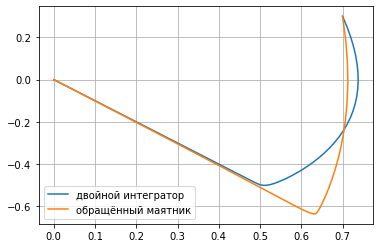

In [3]:
x0  = [0.7, 0.3]
t0 = 0
tf  = 100

sol_dbl_int = sci.solve_ivp(rhs_dbl_int, [t0, tf], x0, rtol  =1e-10, atol = 1e-10)
sol_inv_pnd = sci.solve_ivp(rhs_inv_pnd, [t0, tf], x0, rtol  =1e-10, atol = 1e-10)

plt.plot(sol_dbl_int.y[0,:], sol_dbl_int.y[1,:], label = 'двойной интегратор')
plt.plot(sol_inv_pnd.y[0,:], sol_inv_pnd.y[1,:], label = 'обращённый маятник')
plt.legend(loc='lower left')
plt.grid()
plt.show()

### Возможные задачи

1. Rafał Wiśniewski Sliding Mode Attitude Control for Magnetic Actuated Satellite
https://doi.org/10.1016/S1474-6670(17)41076-7


2. A.Cavallo, G.De Maria, F.Ferrara, P.Nistri A Sliding Manifold Approach to Satellite Attitude Control
https://doi.org/10.1016/S1474-6670(17)48874-4


3. M.Yu.Ovchinnikov, D.S.Roldugin, V.I.Penkov, S.S.Tkachev, Y.V.Mashtakov Fully magnetic sliding mode control for acquiring three-axis attitude
https://doi.org/10.1016/j.actaastro.2015.12.031


4. Runcharoon, K., & Srichatrapimuk, V. (2013). Sliding Mode Control of quadrotor. 2013 The International Conference on Technological Advances in Electrical, Electronics and Computer Engineering (TAEECE).
https://doi.org/10.1109/TAEECE.2013.6557334)


5. Olfa Jedda, Jalel Ghabi & Ali Douik  Sliding Mode Control of an Inverted Pendulum
https://link.springer.com/chapter/10.1007/978-981-10-2374-3_6